### Multivariate Analysis Homework 1

#### Q1: Are the above 3 prediction models similar, or different? 

+ PCR, PLS 有著相同的目的，想要解決多重共線性的問題，其中 PLS 借助了 PCA 與 CCA 的原理，先利用 PCA 提取出 response and variables 中的主成份，再使主成份間的相關性最大化，借助 CCA 的思想，而這三個模型是 Linear Model 若變量之間發生了共線性，必須借助 PCR, PLS 等方式去解決這些問題，所以是一般的 Linear Model 對於模型的時候，想辦法線性模型表現更好的處理方式。

---

#### 由於 cross validation 都取 10 folds，我們直接從 MSE 的大小去比較模型的預測能力，表格如下：


#### MSE比較:

LS: $202$

PC: $13.03^2 = 169.7809$

PLS: $13.09^2 = 171.3481$

#### Q2: Which model is best for predicting the college’s “Academic Reputation”? Explain why.

+ 可以知道在預測能力上 PCR > PLS > LS，但其實 PCR 與 PLS 表現上十分接近。

+ 明顯的可以看出在 MSE 上 PCR 的表現略優於 PLS，而 PCR、PLS 皆優於 LS 很多，LS 在此資料上表現得不好是因為資料中的 International_Faculty 和 International_Students 在 correlation 上約有 0.695，在 scatterplot matrices 內可以 看出類似現象，算是中等程度的線性關係，所以 PCR、PLS 都可以針對此種問 題進行處理，可以想見在表現上 LS 的表現會比前兩者差，由於變量只有五 個，PCR 和 PLS 選取的 components 個數應該會差不多，表現相近很合理。

---

## Code:

In [15]:
library(DAAG)
library(pls)
library(psych)
options(warn = 1)

In [22]:
# read the data
df = read.csv("/Users/cyachc/hw1_data.csv", header = TRUE)

# take the model matrix and response from data
data = df[, 3:8]
head(data)

Academic_Reputation,Employer_Reputation,Faculty_Student,Faculty_Citation,International_Faculty,International_Students
100.0,100.0,100.0,99.8,100.0,94.1
100.0,100.0,100.0,98.6,99.8,67.7
100.0,100.0,98.7,99.6,86.3,62.2
100.0,100.0,100.0,84.7,99.7,98.5
97.8,81.2,100.0,100.0,99.4,87.3
98.4,96.7,85.0,98.4,100.0,98.0


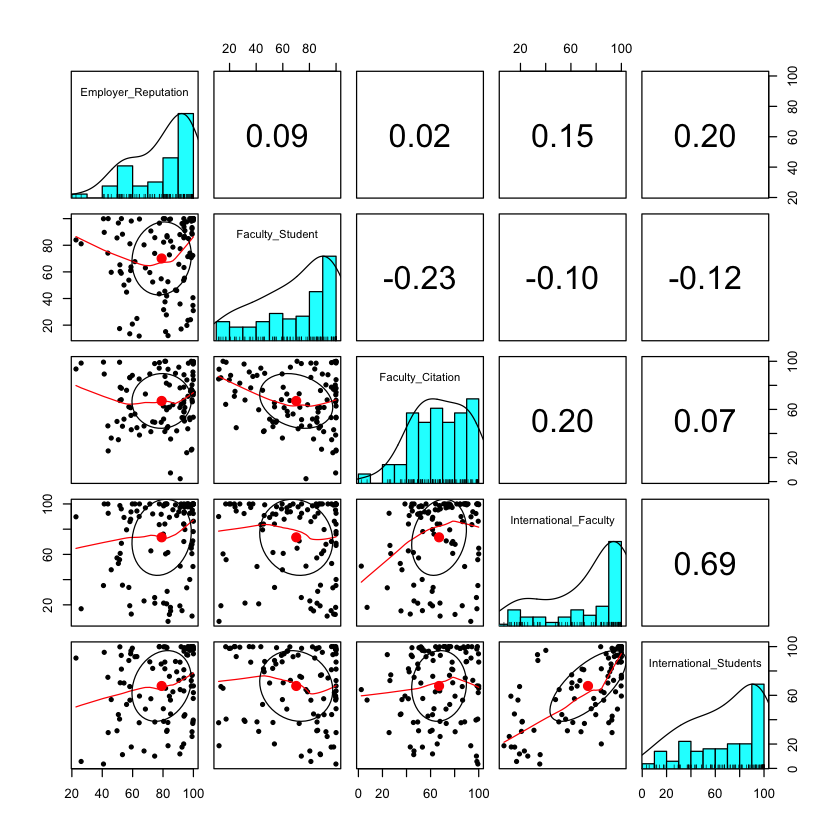

In [18]:
# 看一下任兩個變量之間的 scatter plot
pairs.panels(data[, -1], method = "pearson", density = TRUE)

In [23]:
# fit the linear model without intercept
lm1 = lm(Academic_Reputation ~ Employer_Reputation + Faculty_Student + Faculty_Citation + International_Faculty
         + International_Students - 1, data = data)
summary(lm1)


Call:
lm(formula = Academic_Reputation ~ Employer_Reputation + Faculty_Student + 
    Faculty_Citation + International_Faculty + International_Students - 
    1, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-55.93  -6.99   1.02   8.44  39.68 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
Employer_Reputation      0.7100     0.0641   11.08  < 2e-16 ***
Faculty_Student          0.1284     0.0465    2.76   0.0069 ** 
Faculty_Citation         0.2309     0.0562    4.11  8.3e-05 ***
International_Faculty   -0.0350     0.0673   -0.52   0.6045    
International_Students   0.0455     0.0691    0.66   0.5120    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.2 on 95 degrees of freedom
Multiple R-squared:  0.973,	Adjusted R-squared:  0.971 
F-statistic:  675 on 5 and 95 DF,  p-value: <2e-16


In [20]:
# 檢視 model 的 vif 值，在 Employer_Reputatioin & International_Faculty & International_Students 上 vif 值都超過 10
# 表示可能有蠻強的多重共線性
print(vif(lm1))

   Employer_Reputation        Faculty_Student       Faculty_Citation 
                 13.48                   6.06                   7.81 
 International_Faculty International_Students 
                 14.13                  12.79 


+ 其中 International_Students 和 International_Faculty、這兩組變量之間的共線性中等，結合上方的圖來看，此 linear model 不太好，的確適合這次作業的主題，應該可以使用 pricipal component regression 去解決一些共線性的問題，這邊可以先猜測使用 PCR 應該會將五維變量將成四維，使達到較好的模型。

+ 在 residualt versus fitted value 的 residual plot 圖中，隨著 fitted value 變大 residual 的變異有跟著變大的 pattern，可以考慮使用 WLS 去解決這個問題。

+ 在 residual versus 五個變量的 residual plots 中，在 Employer_Reputation & Faculty_Student  "看起來"有點線性關係的 pattern 在裡面，但不是太明顯，在這個作業就簡單做，所以在此忽略。

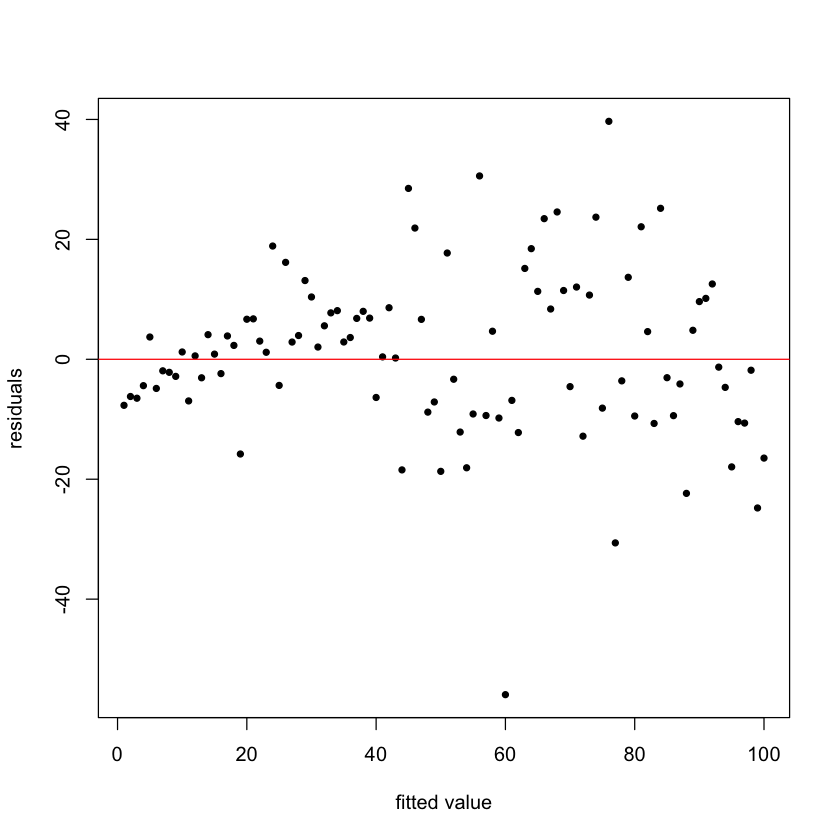

In [7]:
# residual plot between residual and fitted value
plot(resid(lm1), pch = 20, ylab = "residuals", xlab = "fitted value")
abline(h = 0, col = "red")

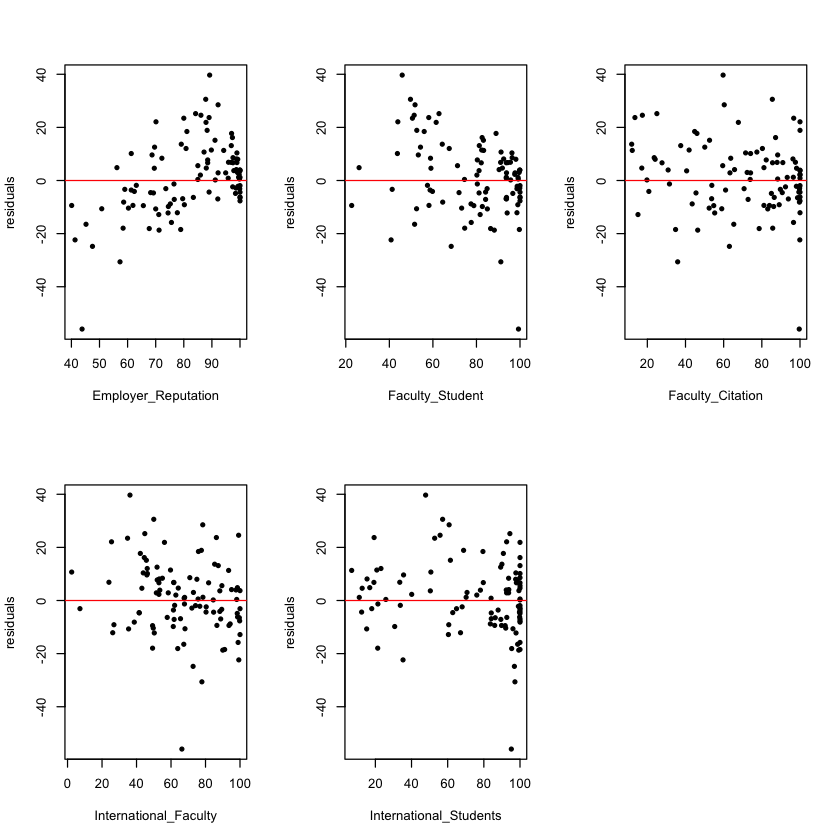

In [8]:
# residual plots between residual and 5 variables
par(mfrow = c(2, 3))
for (i in 1:5){
    plot(data[, i], lm1$res, pch = 20, ylab = "residuals", xlab = colnames(data)[i+1])
    abline(h = 0, col = "red")
}

In [9]:
# 測試一下前面 least square 的預測能力
cv.lm(data, formula(Academic_Reputation ~ Employer_Reputation + Faculty_Student + Faculty_Citation + 
                    International_Faculty + International_Students - 1), m = 10, plotit = FALSE, printit = TRUE)

Analysis of Variance Table

Response: Academic_Reputation
                       Df Sum Sq Mean Sq F value  Pr(>F)    
Employer_Reputation     1 676011  676011 3344.79 < 2e-16 ***
Faculty_Student         1   2025    2025   10.02  0.0021 ** 
Faculty_Citation        1   3873    3873   19.16 3.1e-05 ***
International_Faculty   1      1       1    0.01  0.9407    
International_Students  1     88      88    0.43  0.5120    
Residuals              95  19200     202                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


fold 1 
Observations in test set: 10 
                         3     13    35   39    44   66    83   84    95    98
Predicted           106.49 102.99 89.32 89.0  97.3 56.5  80.7 59.0  76.3 64.92
cvpred              107.19 104.49 89.04 89.4  98.0 55.9  81.9 58.2  77.4 65.78
Academic_Reputation 100.00  99.90 92.20 95.9  78.9 80.0  70.0 84.2  58.4 63.10
CV residual          -7.19  -4.59  3.16  6.5 -19.1 24.1 -11.9 26.0 -19.0 -2.68

Sum of squar

In [10]:
# use priciple component regression to fit model
set.seed(1)
pcr_fit = pcr(Academic_Reputation ~ Employer_Reputation + Faculty_Student + Faculty_Citation + 
              International_Faculty + International_Students - 1, data = data, scale = TRUE, validation = "CV")
summary(pcr_fit)

Data: 	X dimension: 100 5 
	Y dimension: 100 1
Fit method: svdpc
Number of components considered: 5

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV           16.41    16.33    16.04    13.51    13.03    13.12
adjCV        16.41    16.32    16.01    13.34    13.00    13.09

TRAINING: % variance explained
                     1 comps  2 comps  3 comps  4 comps  5 comps
X                     37.131   61.290    79.22    94.29   100.00
Academic_Reputation    2.487    9.336    38.77    41.62    41.67


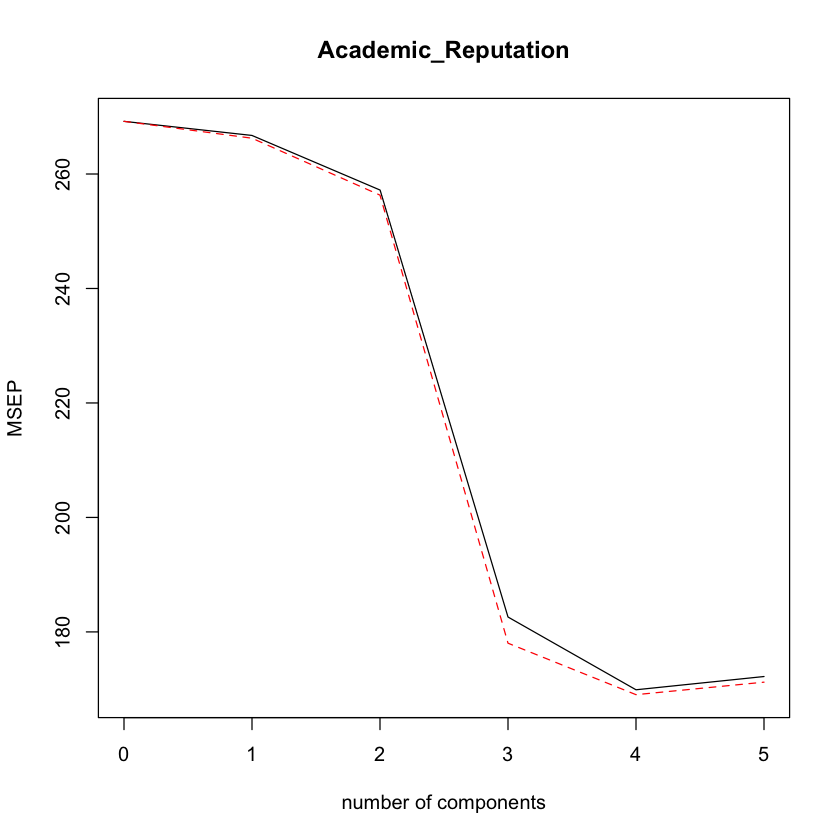

In [11]:
# graph the validation plot
validationplot(pcr_fit, val.type = "MSEP")

#### PCR 在 component number 為 4 時，造成的 MSEP 達到最小，故 number of components 的數目取 4

In [12]:
# use partial least square to fit model
set.seed(1)
pls_fit = plsr(Academic_Reputation ~ Employer_Reputation + Faculty_Student + Faculty_Citation + 
               International_Faculty + International_Students - 1, data = data, scale = TRUE, validation = "CV")
summary(pls_fit)

Data: 	X dimension: 100 5 
	Y dimension: 100 1
Fit method: kernelpls
Number of components considered: 5

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV           16.41    13.41    13.13    13.09    13.11    13.12
adjCV        16.41    13.36    13.09    13.05    13.07    13.09

TRAINING: % variance explained
                     1 comps  2 comps  3 comps  4 comps  5 comps
X                      23.00    54.33    77.90    91.42   100.00
Academic_Reputation    39.17    41.55    41.66    41.67    41.67


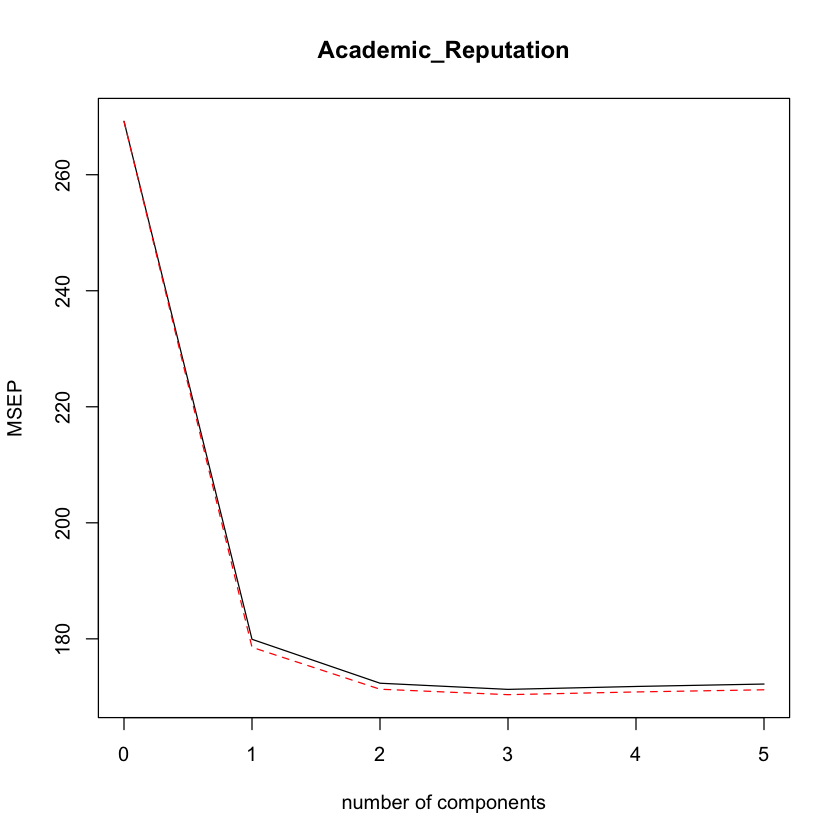

In [13]:
# graph the validation plot
validationplot(pls_fit, val.type = "MSEP")

#### pls 在 components 的數目為 3 的時候 MSEP 最小，故 number of components 取 3